# --------------------- CLASSIFICATION-CREDIT SCORE----------------------------------

### PROBLEM STATEMENT- You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts. Given a person’s credit-related information, build a machine learning model that can classify the credit score.

### DATATSET INFORMATION- Credit score dataset contains 1 lakh records with 28 features.

## 1. Importing the libraries

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore",category=RuntimeWarning)

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

## 2. Loading the data

In [288]:
df=pd.read_csv('credit_score.csv')

C:\Users\dell\AppData\Local\Temp\ipykernel_14332\3527721954.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('credit_score.csv')


In [290]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## 3. Checking the shape of a dataframe and datatypes of all columns along with calculating the statistical data.

In [291]:
df.shape

(100000, 28)

In [292]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

## 4. Missing Values

In [293]:
df.isnull().sum()  

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [294]:
df.columns 

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## 5. Data Cleaning

In [295]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=df[i].str.replace("_","").replace("",np.nan)
        try:
            df[i]=df[i].astype(int) 
        except ValueError:
            try:
                df[i]=df[i].astype(float)
            except ValueError:
                pass   

In [296]:
df.Credit_Mix.unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [297]:
df.Payment_of_Min_Amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [298]:
df.Payment_of_Min_Amount=df.Payment_of_Min_Amount.replace('NM','NO')

In [299]:
df.Payment_Behaviour.unique()

array(['HighspentSmallvaluepayments', 'LowspentLargevaluepayments',
       'LowspentMediumvaluepayments', 'LowspentSmallvaluepayments',
       'HighspentMediumvaluepayments', '!@9#%8',
       'HighspentLargevaluepayments'], dtype=object)

In [300]:
df.Payment_Behaviour=df.Payment_Behaviour.replace('!@9#%8',np.nan) 

In [301]:
df.Occupation.unique() 

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'MediaManager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [302]:
df.SSN=df.SSN.replace('#F%$D@*&8',np.nan) 

In [303]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

In [304]:
for i in df.columns:
    if df[i].isnull().any() and (df[i].dtype=='int64' or df[i].dtype=='float64'):
        df[i]=df[i].fillna(df[i].mean())
    elif df[i].isnull().any() and df[i].dtype=='object':
        df[i]=df[i].fillna(df[i].mode()[0])

### 6.Outliers Check

Axes(0.125,0.11;0.775x0.77)


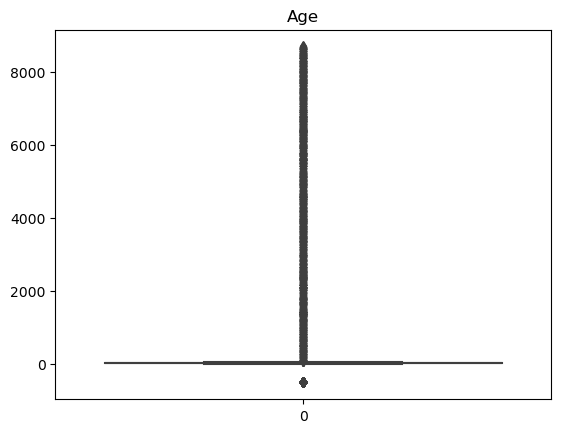

Axes(0.125,0.11;0.775x0.77)


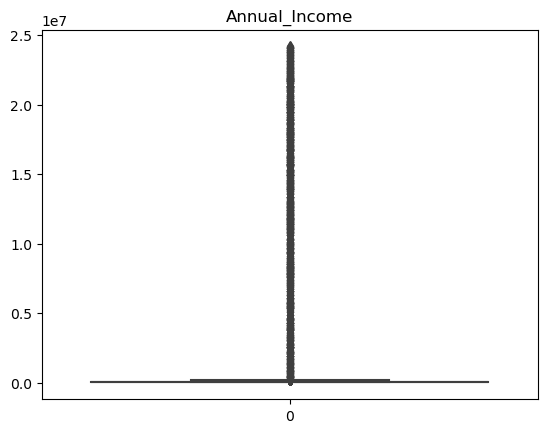

Axes(0.125,0.11;0.775x0.77)


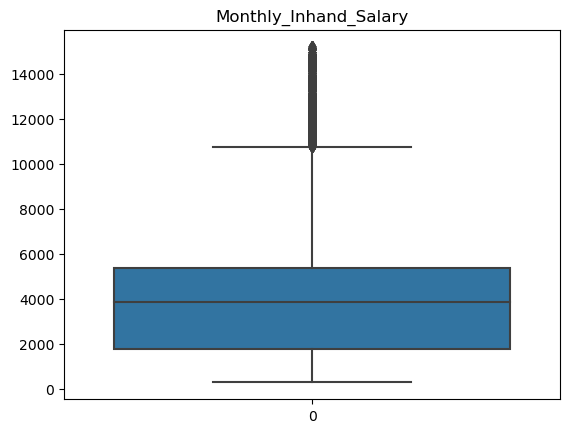

Axes(0.125,0.11;0.775x0.77)


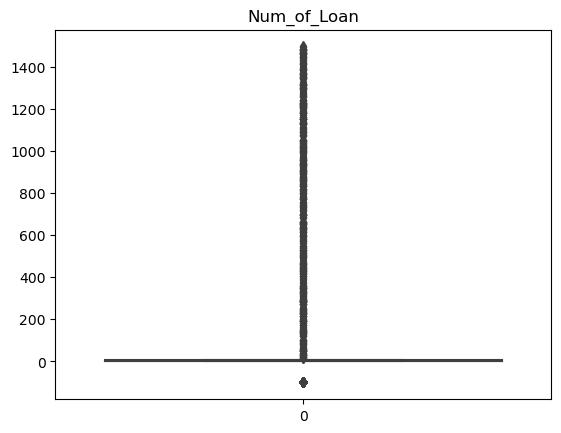

Axes(0.125,0.11;0.775x0.77)


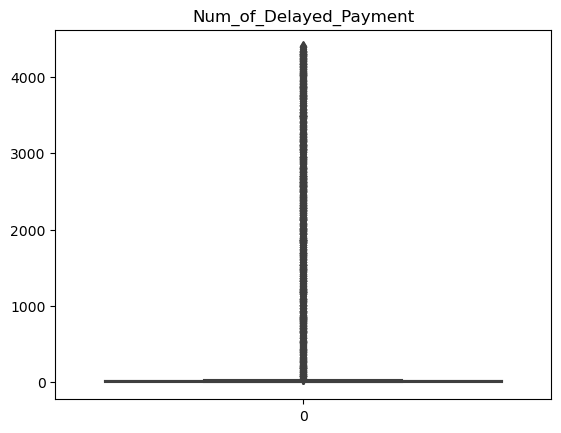

Axes(0.125,0.11;0.775x0.77)


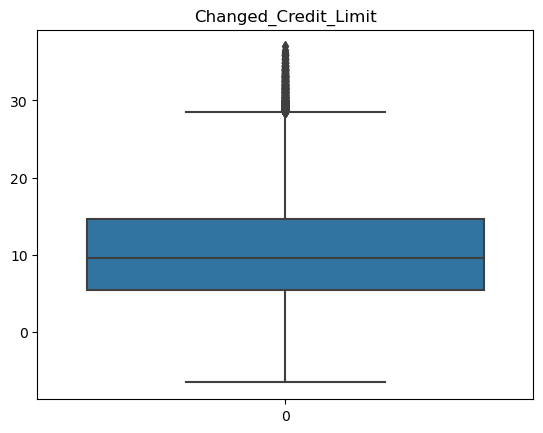

Axes(0.125,0.11;0.775x0.77)


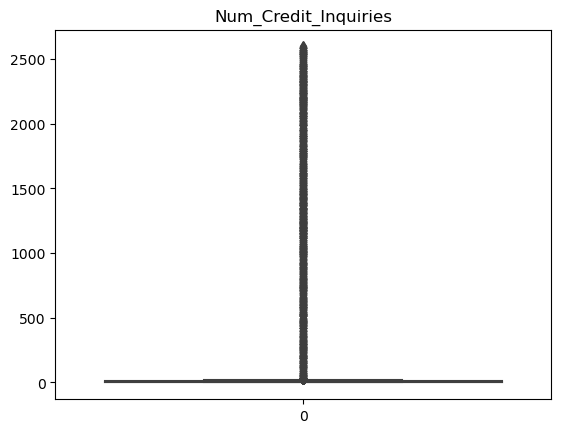

Axes(0.125,0.11;0.775x0.77)


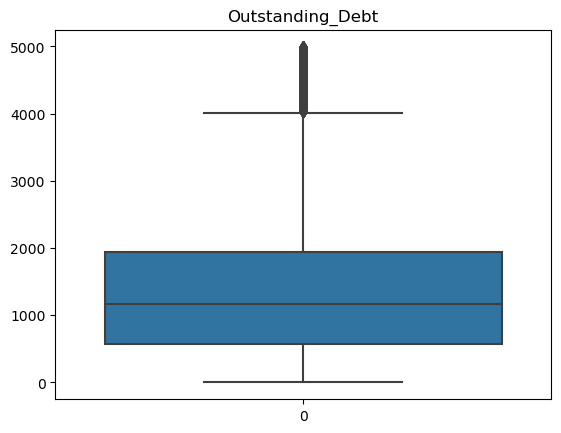

Axes(0.125,0.11;0.775x0.77)


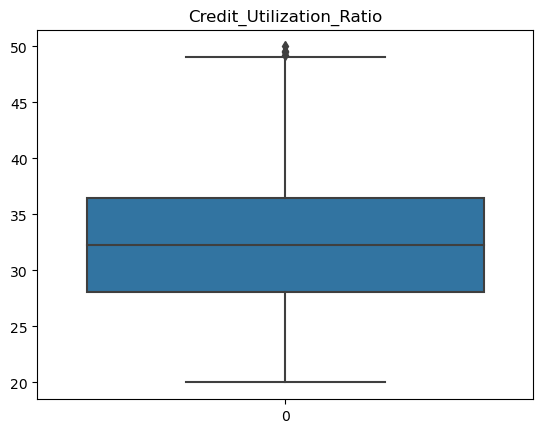

Axes(0.125,0.11;0.775x0.77)


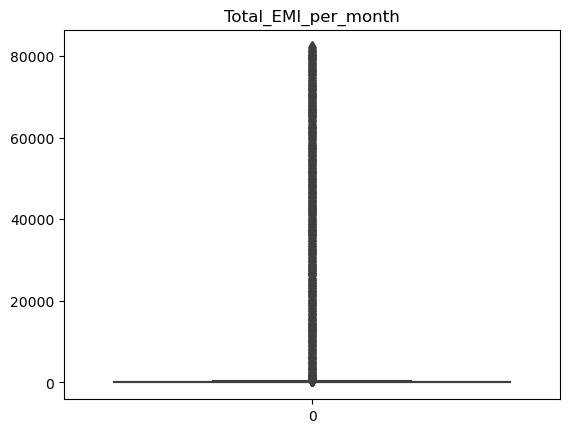

Axes(0.125,0.11;0.775x0.77)


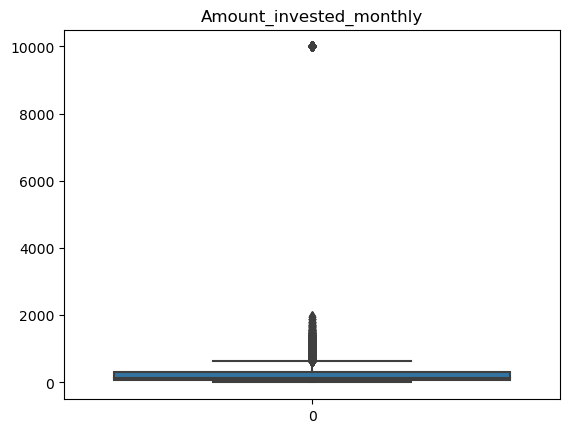

Axes(0.125,0.11;0.775x0.77)


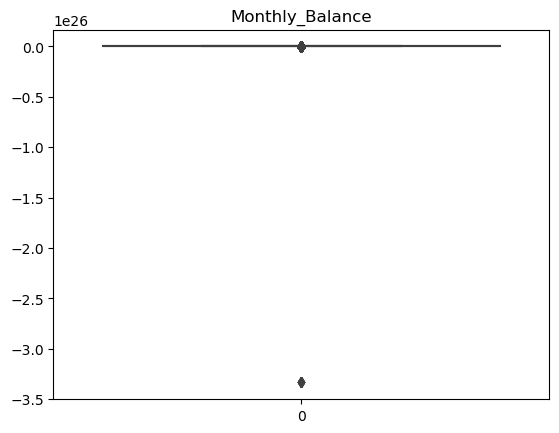

In [305]:
for i in df.columns:
    if df[i].dtypes=='int' or df[i].dtypes=='float':
        print(sns.boxplot(df[i]))
        plt.title(i)
        plt.show()

In [306]:
outliers=['Age','Annual_Income','Monthly_Inhand_Salary','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

In [311]:
for i in outliers:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-iqr*1.5
    ul=q3+iqr*1.5
    df=df[(df[i]>ll)&(df[i]<ul)]

Axes(0.125,0.11;0.775x0.77)


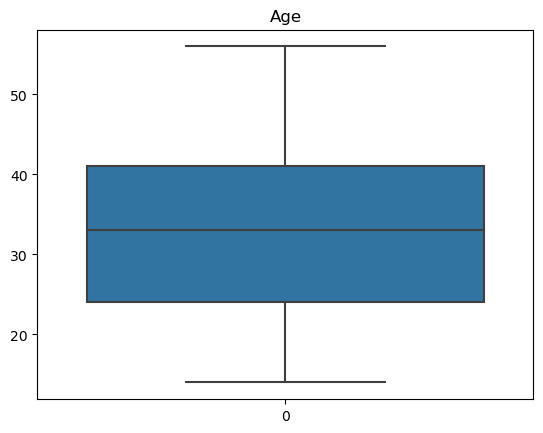

Axes(0.125,0.11;0.775x0.77)


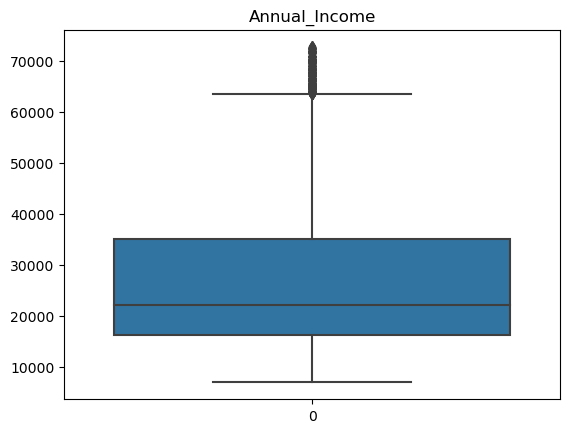

Axes(0.125,0.11;0.775x0.77)


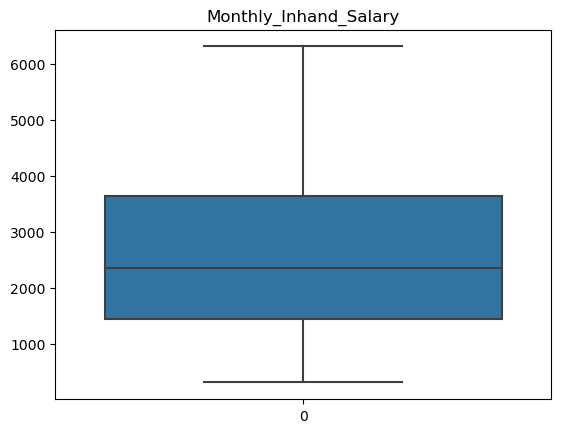

Axes(0.125,0.11;0.775x0.77)


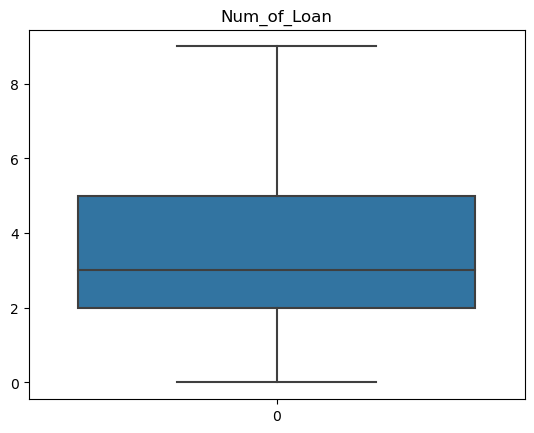

Axes(0.125,0.11;0.775x0.77)


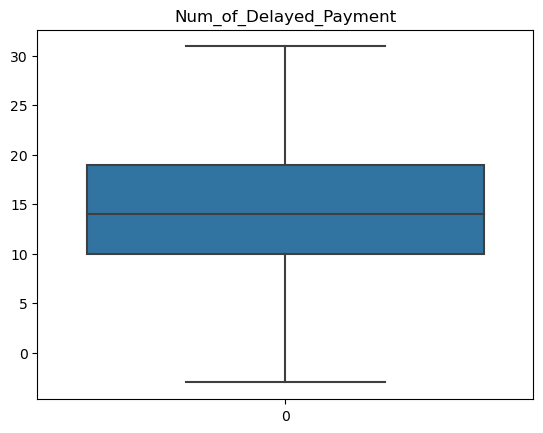

Axes(0.125,0.11;0.775x0.77)


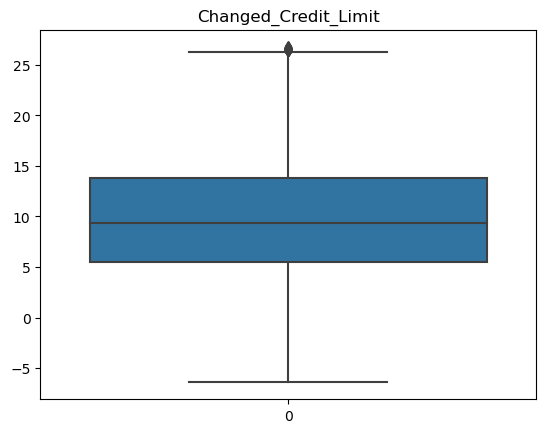

Axes(0.125,0.11;0.775x0.77)


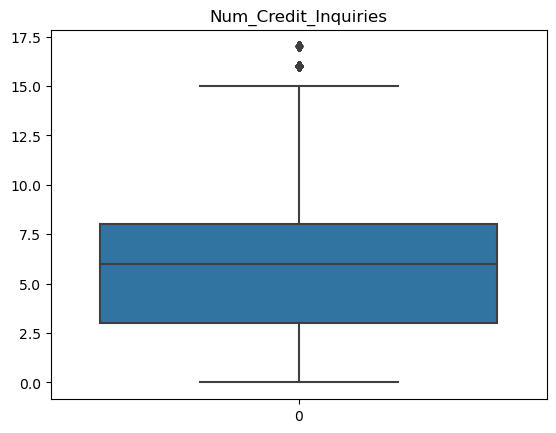

Axes(0.125,0.11;0.775x0.77)


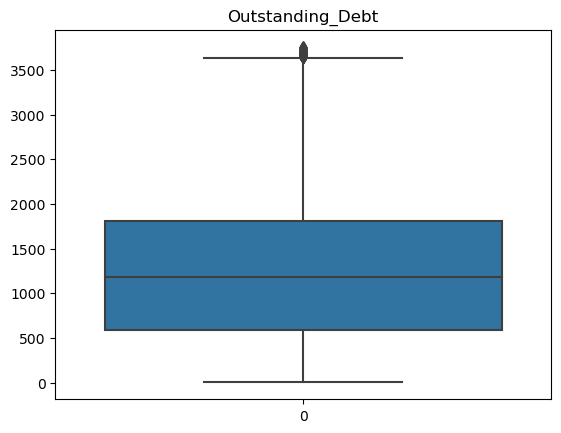

Axes(0.125,0.11;0.775x0.77)


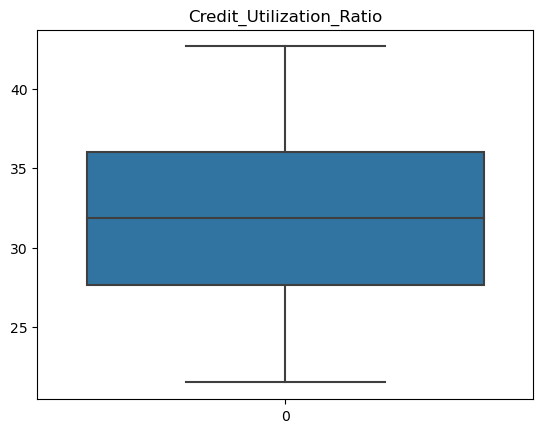

Axes(0.125,0.11;0.775x0.77)


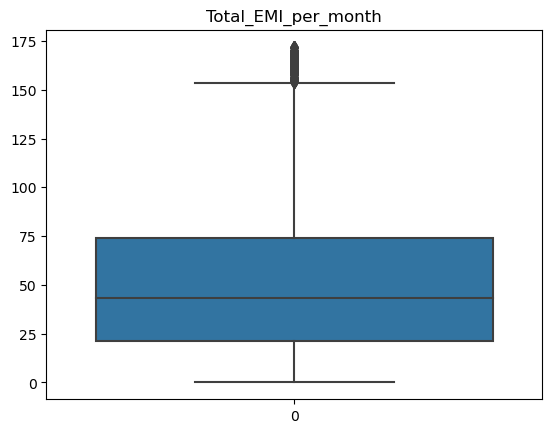

Axes(0.125,0.11;0.775x0.77)


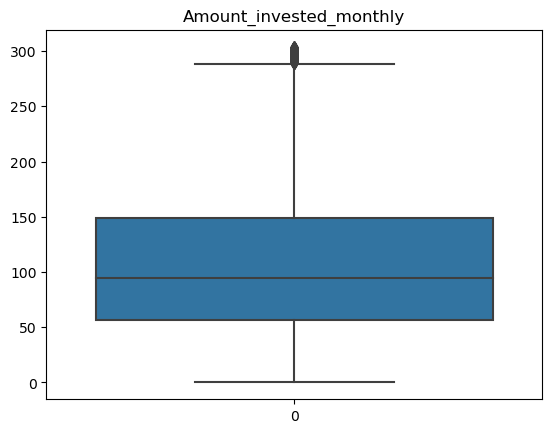

Axes(0.125,0.11;0.775x0.77)


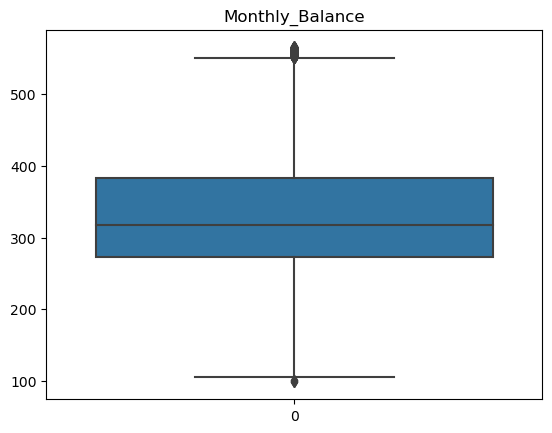

In [312]:
for i in df.columns:
    if df[i].dtypes=='int' or df[i].dtypes=='float':
        print(sns.boxplot(df[i]))
        plt.title(i)
        plt.show()

In [313]:
df.shape

(41710, 28)

### 7.Label Encoder

In [314]:
le=LabelEncoder()

In [315]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41710 entries, 0 to 98301
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        41710 non-null  int32  
 1   Customer_ID               41710 non-null  int32  
 2   Month                     41710 non-null  int32  
 3   Name                      41710 non-null  int32  
 4   Age                       41710 non-null  int32  
 5   SSN                       41710 non-null  int32  
 6   Occupation                41710 non-null  int32  
 7   Annual_Income             41710 non-null  float64
 8   Monthly_Inhand_Salary     41710 non-null  float64
 9   Num_Bank_Accounts         41710 non-null  int64  
 10  Num_Credit_Card           41710 non-null  int64  
 11  Interest_Rate             41710 non-null  int64  
 12  Num_of_Loan               41710 non-null  int32  
 13  Type_of_Loan              41710 non-null  int32  
 14  Delay_

## 8.Variance Inflation Factor

In [317]:
col_list=[]

for i in df.columns:
    if i!='Credit_Score':
        col_list.append(i)

x=df[col_list]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j) for j in range(len(x.columns))]

### Selecting the features using VIF. VIF should be less than 5.

In [318]:
vif_data

,features,vif
0,ID,3.980351
1,Customer_ID,3.950351
2,Month,3.313544
3,Name,4.309142
4,Age,10.687444
5,SSN,3.386685
6,Occupation,3.781864
7,Annual_Income,80.491910
8,Monthly_Inhand_Salary,11.855155
9,Num_Bank_Accounts,1.022342


In [319]:
x.drop(['Monthly_Balance','Annual_Income'],axis=1,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14332\83992166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['Monthly_Balance','Annual_Income'],axis=1,inplace=True)


In [320]:
x

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour
0,7019,7427,3,54,23,6115,12,1824.843333,3,4,...,11.27,4.0,2,809.98,26.822620,179,1,49.574949,80.415295,2
1,7020,7427,2,54,23,6115,12,4194.170850,3,4,...,11.27,4.0,1,809.98,31.944960,85,1,49.574949,118.280222,3
3,7030,7427,0,54,23,6115,12,4194.170850,3,4,...,6.27,4.0,1,809.98,31.377862,184,1,49.574949,199.458074,5
4,7031,7427,7,54,23,6115,12,1824.843333,3,4,...,11.27,4.0,1,809.98,24.797347,185,1,49.574949,41.420153,1
5,7041,7427,5,54,23,6115,12,4194.170850,3,4,...,9.27,4.0,1,809.98,27.262259,186,1,49.574949,62.430172,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98295,25917,5966,1,3900,29,2680,5,2942.328333,7,6,...,3.45,1.0,2,942.59,33.128609,242,1,0.000000,165.397552,2
98296,25918,5681,3,5049,38,7365,7,3152.962500,0,4,...,1.58,2.0,2,599.40,31.469081,205,1,25.671257,232.909909,5
98297,25919,5681,2,5049,38,7365,7,4194.170850,0,4,...,1.58,2.0,1,599.40,38.442034,85,1,25.671257,218.360354,2
98300,25920,5681,7,5049,38,7365,7,3152.962500,1194,4,...,1.58,2.0,1,599.40,26.268474,219,1,25.671257,76.057218,0


In [321]:
col_list=[]

for i in x.columns:
    if i!='Credit_Score':
        col_list.append(i)

x=x[col_list]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j) for j in range(len(x.columns))]

In [322]:
vif_data

,features,vif
0,ID,3.888974
1,Customer_ID,3.872276
2,Month,3.274127
3,Name,4.227877
4,Age,9.650084
5,SSN,3.342183
6,Occupation,3.719943
7,Monthly_Inhand_Salary,8.015356
8,Num_Bank_Accounts,1.022267
9,Num_Credit_Card,1.030825


In [323]:
x.drop('Credit_Utilization_Ratio',axis=1,inplace=True) 

In [324]:
col_list=[]

for i in x.columns:
    if i!='Credit_Score':
        col_list.append(i)

x=x[col_list]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j) for j in range(len(x.columns))]

In [325]:
vif_data

,features,vif
0,ID,3.808050
1,Customer_ID,3.793702
2,Month,3.225886
3,Name,4.142240
4,Age,8.611184
5,SSN,3.294481
6,Occupation,3.659781
7,Monthly_Inhand_Salary,7.610653
8,Num_Bank_Accounts,1.022165
9,Num_Credit_Card,1.030775


In [326]:
x.drop('Num_of_Loan',axis=1,inplace=True)

In [327]:
col_list=[]

for i in x.columns:
    if i!='Credit_Score':
        col_list.append(i)

x=x[col_list]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j) for j in range(len(x.columns))]

In [328]:
vif_data

,features,vif
0,ID,3.800324
1,Customer_ID,3.785239
2,Month,3.223188
3,Name,4.137517
4,Age,8.581827
5,SSN,3.294076
6,Occupation,3.655521
7,Monthly_Inhand_Salary,7.041721
8,Num_Bank_Accounts,1.022074
9,Num_Credit_Card,1.030775


In [329]:
x.drop(['Monthly_Inhand_Salary','Num_of_Delayed_Payment'],axis=1,inplace=True)

In [330]:
col_list=[]

for i in x.columns:
    if i!='Credit_Score':
        col_list.append(i)

x=x[col_list]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j) for j in range(len(x.columns))]

In [331]:
vif_data

,features,vif
0,ID,3.770215
1,Customer_ID,3.756062
2,Month,3.210542
3,Name,4.113932
4,Age,8.257527
5,SSN,3.274791
6,Occupation,3.637938
7,Num_Bank_Accounts,1.021981
8,Num_Credit_Card,1.030661
9,Interest_Rate,1.023952


In [332]:
x.drop('Age',inplace=True,axis=1)

In [333]:
col_list=[]

for i in x.columns:
    if i!='Credit_Score':
        col_list.append(i)

x=x[col_list]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j) for j in range(len(x.columns))]

In [334]:
vif_data

,features,vif
0,ID,3.712741
1,Customer_ID,3.683435
2,Month,3.158170
3,Name,4.045788
4,SSN,3.228501
5,Occupation,3.579428
6,Num_Bank_Accounts,1.021829
7,Num_Credit_Card,1.030624
8,Interest_Rate,1.023813
9,Type_of_Loan,4.027564


## 9. Model Building

In [335]:
X=x

In [336]:
y=df['Credit_Score']

In [337]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)

In [338]:
dt=DecisionTreeClassifier()

In [339]:
dt.fit(X_train,y_train) 

DecisionTreeClassifier()

In [340]:
pred=dt.predict(X_test) 

In [341]:
accuracy_score(pred,y_test)

0.697554543274994

## 10. Hyperparameter tuning on Decision Tree

In [342]:
parameters={'max_features':['log2','sqrt','auto'],
            'criterion':['entropy','gini'],
            'max_depth':[2,3,5,10,50],
            'min_samples_split':[2,3,50,100],
            'min_samples_leaf':[1,5,8,10]   
}

grid_obj=GridSearchCV(dt,parameters)
grid_obj=grid_obj.fit(X_train,y_train)
dt=grid_obj.best_estimator_

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\del

In [343]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=50, max_features='sqrt', min_samples_split=100)

In [344]:
pred=dt.predict(X_test)

In [348]:
acc_score=round(accuracy_score(pred,y_test)*100,2)

In [351]:
acc_score

70.61

### Here, We are using GridSearch CV techniquewhich is used to identify the optimal hyperparameters for a model and the accuracy obtained from Decision Tree is 70.61.

## 11. Random Forest Classifier

In [352]:
from sklearn.ensemble import RandomForestClassifier

In [353]:
rfc=RandomForestClassifier()

In [354]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [355]:
y_pred=rfc.predict(X_test)

In [356]:
acc_score=round(accuracy_score(y_pred,y_test)*100,2)

In [357]:
acc_score

79.09

### The accuracy of the random forest model is 79.09 percentage.